In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os
import glob

import pandas as pd
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
pathname = '../ppmi/cd-pd/PPMI/3000/AX_T2_FLAIR/2011-02-01_08_05_22.0/S102118'
imgs = os.listdir(pathname)
imgs.sort()

In [3]:
imgs_ls = []
def load_scan(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            imgs_ls.append(os.path.join(dirName, filename))
            
    return imgs_ls

first_patient = load_scan(pathname)

In [4]:
RefDs = pydicom.read_file(first_patient[0])

ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(imgs_ls))

ConstPixelSpacing = (float(RefDs.PixelSpacing[0]),
                     float(RefDs.PixelSpacing[1]),
                     float(RefDs.SliceThickness))

In [5]:
ConstPixelDims

(512, 512, 18)

In [6]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*
               ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*
               ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*
               ConstPixelSpacing[2], ConstPixelSpacing[2])

In [7]:
x, y, z

(array([  0.    ,   0.4883,   0.9766,   1.4649,   1.9532,   2.4415,
          2.9298,   3.4181,   3.9064,   4.3947,   4.883 ,   5.3713,
          5.8596,   6.3479,   6.8362,   7.3245,   7.8128,   8.3011,
          8.7894,   9.2777,   9.766 ,  10.2543,  10.7426,  11.2309,
         11.7192,  12.2075,  12.6958,  13.1841,  13.6724,  14.1607,
         14.649 ,  15.1373,  15.6256,  16.1139,  16.6022,  17.0905,
         17.5788,  18.0671,  18.5554,  19.0437,  19.532 ,  20.0203,
         20.5086,  20.9969,  21.4852,  21.9735,  22.4618,  22.9501,
         23.4384,  23.9267,  24.415 ,  24.9033,  25.3916,  25.8799,
         26.3682,  26.8565,  27.3448,  27.8331,  28.3214,  28.8097,
         29.298 ,  29.7863,  30.2746,  30.7629,  31.2512,  31.7395,
         32.2278,  32.7161,  33.2044,  33.6927,  34.181 ,  34.6693,
         35.1576,  35.6459,  36.1342,  36.6225,  37.1108,  37.5991,
         38.0874,  38.5757,  39.064 ,  39.5523,  40.0406,  40.5289,
         41.0172,  41.5055,  41.9938,  42.4821, 

In [8]:
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# go through DCM files
for file in first_patient:
    ds = pydicom.read_file(file)
    ArrayDicom[:, :, first_patient.index(file)] = ds.pixel_array

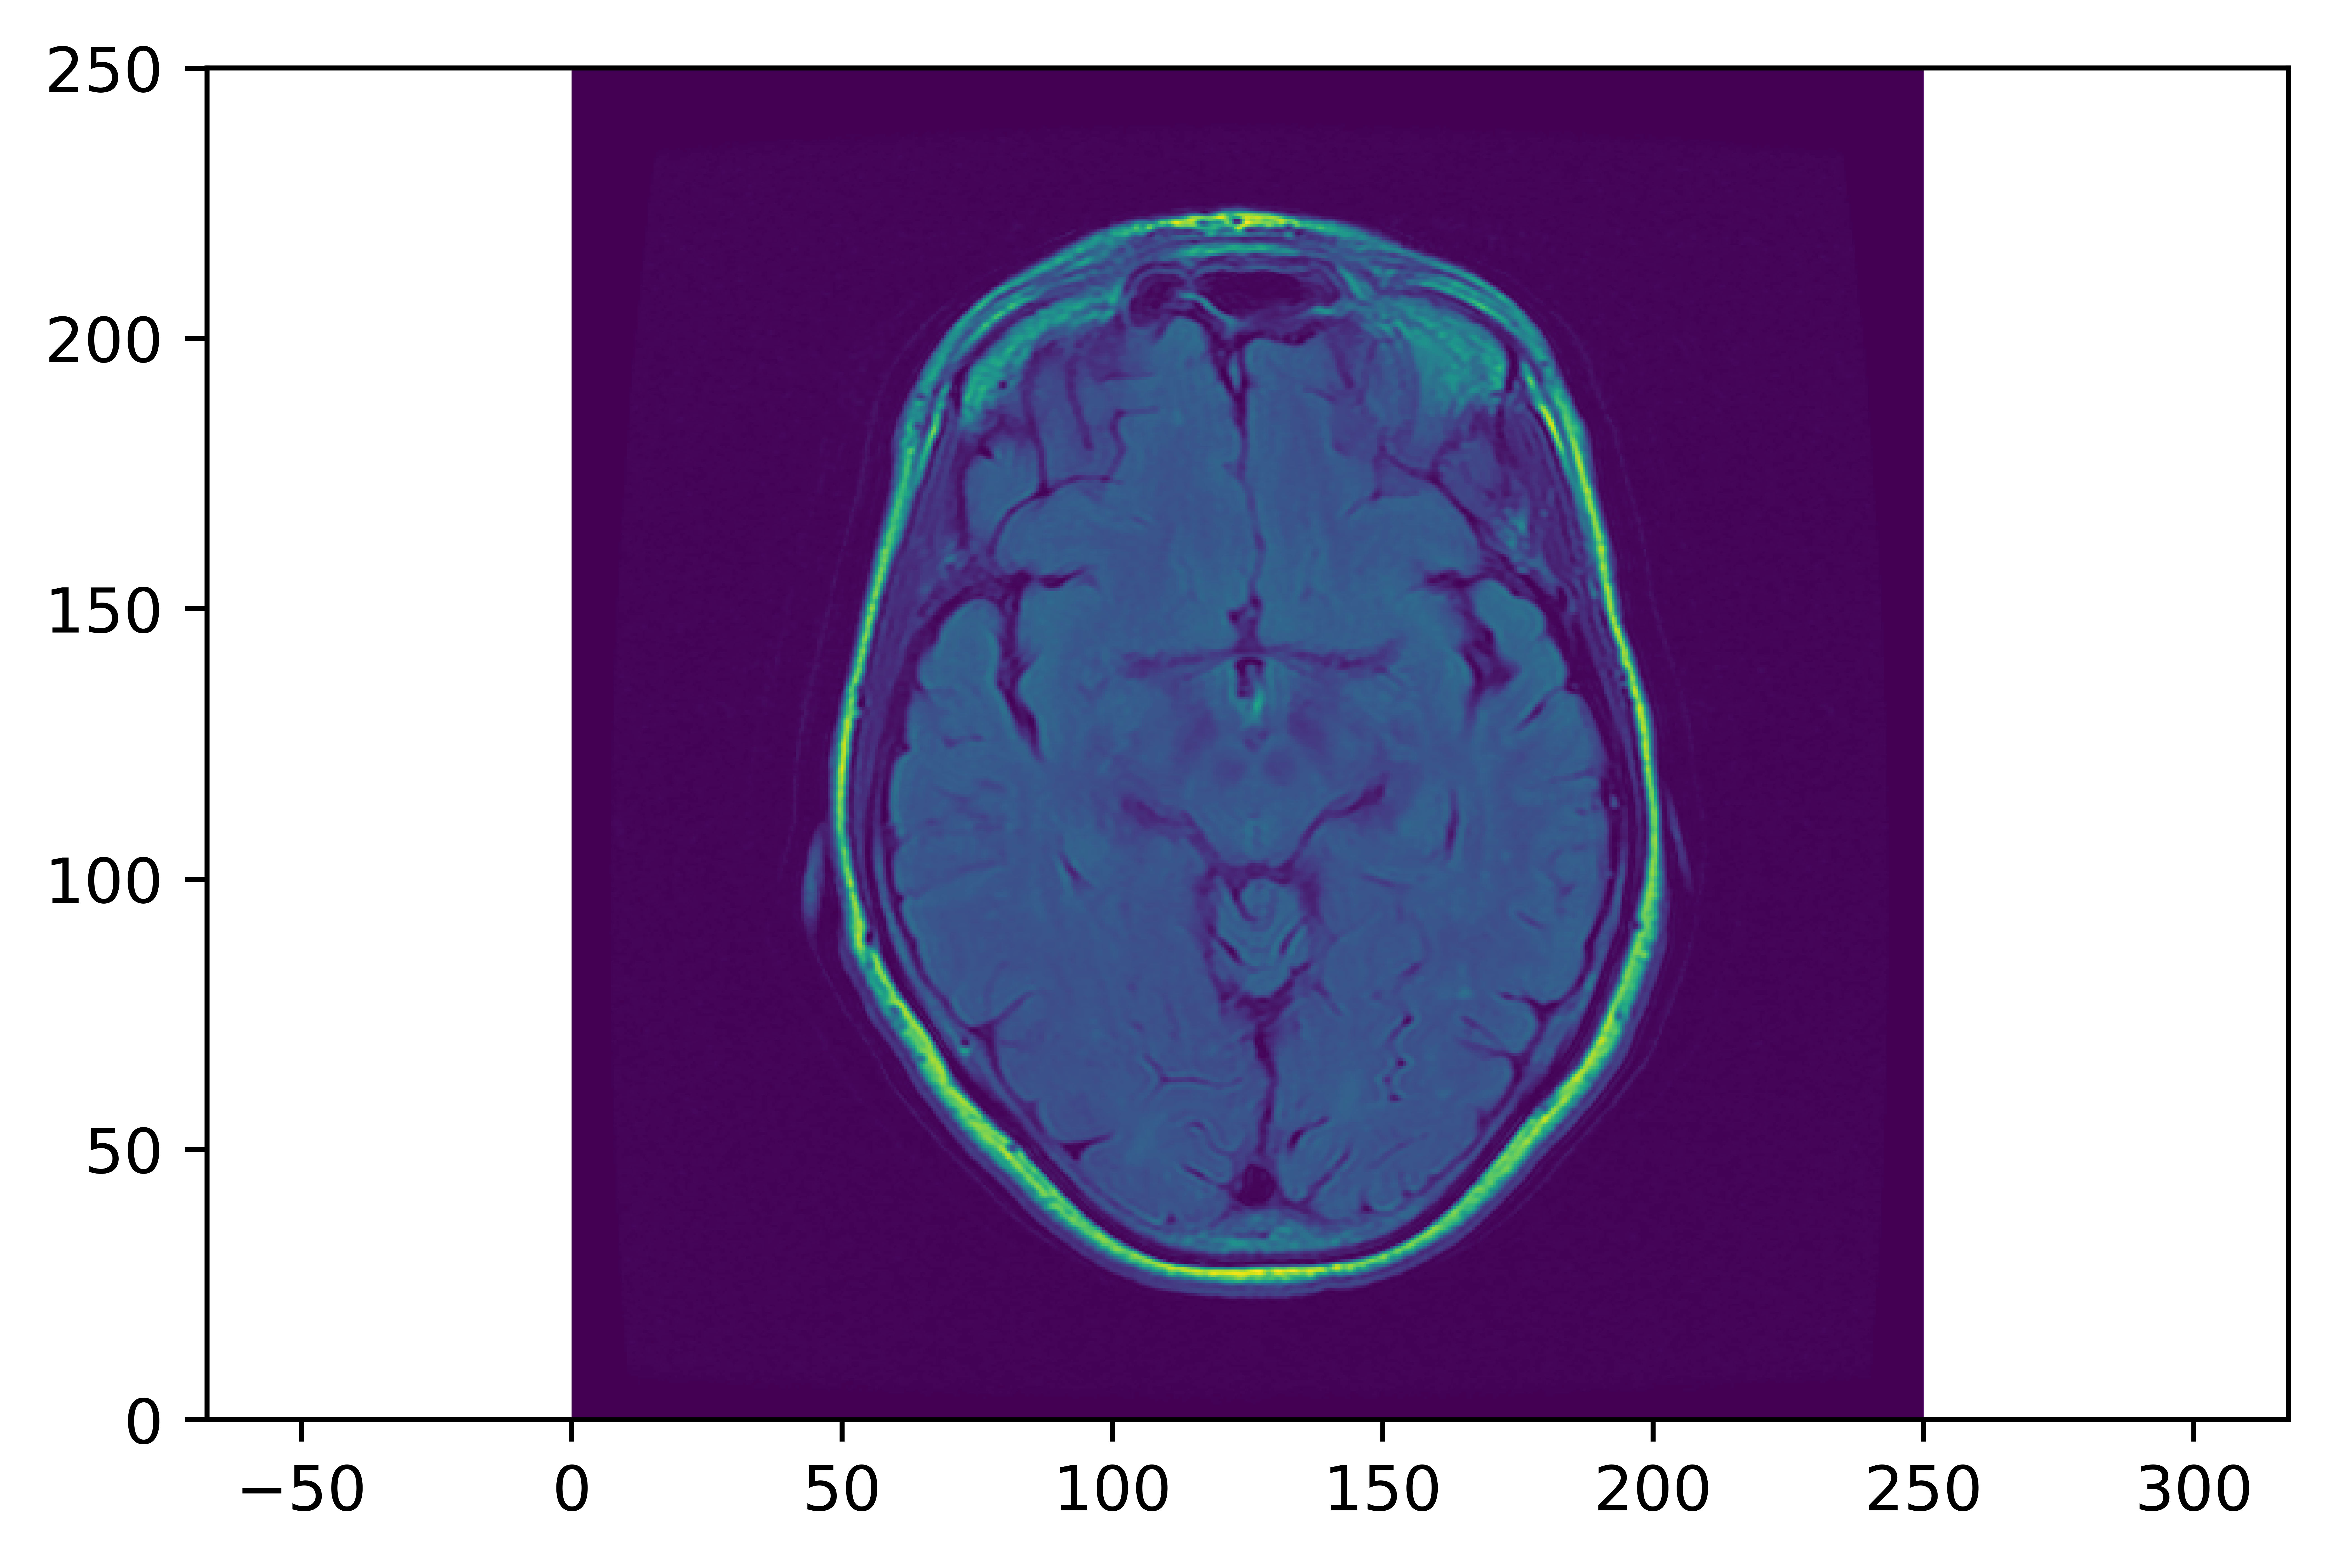

In [9]:
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
# plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 16]))
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)